# This template will calculate the quantum yield of singlet oxygen from a reference sensitizer of Perinapthenone

# Things to note before using this template
- You will need to upload UV-Vis absorbance data and manually input HPLC integration data (in the 6th executable cell with code) 
- Make sure you upload the csv data files from UV-Vis, they should work in the format that the UV-Vis software provides them, otherwise convert it to UTF-8 encoded csv files (but only if you need to, its easier to just upload the files directly from UV-Vis)
- Everywhere there is _____ , change a name to match the name of your file
- When you are pulling out the absorbance data, change the "unnamed" variables to match the measurements you took 
- This template code assumes you ran triplicates for your sample, if your experiment differs from this set up you will need to modify the variables/calculations accordingly

- Any questions/comments/suggestions can be sent to Keighan Gemmell (keighan@chem.ubc.ca) 
- Last updated on April 29th, 2024

# Import Packages

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

# Read in the UV-Vis data as a CSV File

In [ ]:
#First you will need to upload your csv file to this server
#then read in csv file as pandas dataframe, skipping the 2nd row
df = pd.read_csv('_____.csv', skiprows=[1]) #change the name of the csv file to the name of the file you imported

#this will output the table again from pandas (pd). make sure you are pulling out the correct data in the next block of code
df


In [ ]:
wavelength=np.linspace(800,200,601) #make wavelength array

#Note: It's weird, but when reading in the csv file to python, it sometimes auto-names the samples to "unnamed: #" 
#extract absorbances (remember that because of the layout of the csv file the absorbances will sometimes be 
#named "Unnamed: x (odd number). Just check that you are indexing the correct names when assigning variables
sample1_abs = df['Unnamed: x'] 
sample2_abs = df['Unnamed: x']
sample3_abs = df['Unnamed: x']
blank_abs = df['Unnamed: x'] #we do a blank control in our experiments as well (i.e no sensitizer)
PN_abs = df['Unnamed: x'] 

#change all absorbances to type 'float' for ease of calculation
sample1_abs=sample1_abs.astype(float)
sample2_abs=sample2_abs.astype(float)
sample3_abs=sample3_abs.astype(float)
blank_abs=blank_abs.astype(float)
PN_abs=PN_abs.astype(float)


# Read in the Irradiance Data from Actinometry 

In [ ]:
#This is set up for the file I used at the time, modify it for your actinometry file
dfIrr = pd.read_csv('____.csv', skiprows=[1])
Irr=dfIrr['Unnamed: x']


# Convert Irradiance to proper units for photochemical calculations 
- This is what we need to do for our measurements, ignore this cell if it does not apply for your group

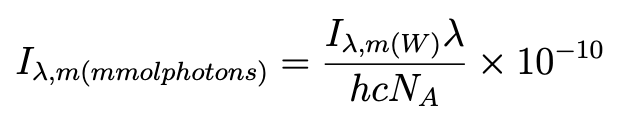

In [ ]:
#Convert data to mmol photon units
c=3*10**8 #m/s, speed of light
h=6.626*10**-34 #J s, Planck constant
Na=6.023*10**23 #mol^-1 , Avagadro number

Irr_mmol=(Irr*wavelength*10**-10)/(h*c*Na) #Convert sunlight irradiance to mmol units

# Do the Absorbance Correction Here
- This is a correction we do to ensure the absorbance of our samples has a baseline at 0. We can discuss this further in the next meeting if it is unclear

In [ ]:
#Do the absorbance corrections
#correct for the baseline
PN_abs=PN_abs-blank_abs
sample1_abs=sample1_abs-blank_abs
sample2_abs=sample2_abs-blank_abs
sample3_abs=sample3_abs-blank_abs

#Find where Irradiation starts to be more than noise 
index_irr=np.argmax(Irr>100) #here I choose 100 as the threshold value for irradiation to be non-negligable 

#Subset 800nm to this wavelength in the absorbance to average for correction
#I start from 0 because in the wavelength array 800nm is in the 0th position
sample1_abs_subset=sample1_abs[0:index_irr]
sample2_abs_subset=sample2_abs[0:index_irr]
sample3_abs_subset=sample3_abs[0:index_irr]
PN_abs_subset=PN_abs[0:index_irr]

#Take the mean
sample1_mean_correction=np.mean(sample1_abs_subset)
sample2_mean_correction=np.mean(sample2_abs_subset)
sample3_mean_correction=np.mean(sample3_abs_subset)
PN_mean_correction=np.mean(PN_abs_subset)

#Subtract to apply the correction
sample1_abs=sample1_abs-sample1_mean_correction
sample2_abs=sample2_abs-sample2_mean_correction
sample3_abs=sample3_abs-sample3_mean_correction
PN_abs=PN_abs-PN_mean_correction


# Plot UV-Vis Data Here

In [ ]:
# Plot the absorbance as a function of wavelength for each sample
fig,ax1=plt.subplots(figsize=(10,6))

#add twin axis to plot both absorbance and irradiance 
ax2=ax1.twinx()

ax1.plot(wavelength, sample1_abs, label='Sample 1')
ax1.plot(wavelength, sample2_abs, label='Sample 2')
ax1.plot(wavelength, sample3_abs, label='Sample 3')
ax1.plot(wavelength, PN_abs, label='PN')

ax2.plot(wavelength,Irr_mmol,'k--',label='Irradiance')

#Modify the above plotting code to the "after irradiance" variables if you want to see that too
# Add a legend and axis labels
ax1.legend()
ax2.legend(loc='center right')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Absorbance')
ax2.set_ylabel('Irradiance ($mmol_{photons} cm^{-2} s^{-1} nm^{-1}$')
ax1.set_title('Title here')
#you can limit the axes here if you want to look at a specific region of the plot
#ax1.set_xlim(left=250, right=500) 
#ax1.set_ylim(top=1.5)

#set the bottom of the figure to 0
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Show the plot
fig.show()

#fig.savefig('___.png') #save the figure here if you want

# Put in your HPLC data here, will need to change times based on your sampling times 

In [ ]:
#Change times to match your times of sampling
times=np.array([0, 2, 4, 8, 16, 32, 60, 90, 120, 180, 240])*60 #put in times and convert to seconds
PNtime=np.array([0, 0.5, 1, 2, 4])*60 #put in times and convert to seconds
othertime=np.array([0, 240])*60 #put in times and convert to seconds

#Put in HPLC Results Here
sample1=[, , , , , , , , , , ]

sample2=[, , , , , , , , , , ]

sample3=[, , , , , , , , , , ]

blank=[, , , , , , , , , , ]

PN=[, , , ,]

dark=[, ] #Control experiment we do

O2purge=[, ] #Another control experiment we do 


# Calculate ln(FFAt/FFA0) here

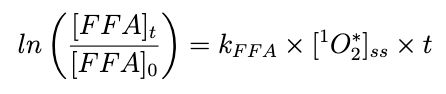

In [ ]:
#Don't worry, np.log is the natural logorithm, not base 10 (np.log10 is base 10)
sample1log=np.log([i/sample1[0] for i in sample1])
sample2log=np.log([i/sample2[0] for i in sample2])
sample3log=np.log([i/sample3[0] for i in sample3])
PNlog=np.log([i/PN[0] for i in PN])


# Obtain the slope using a 1st degree polynomial fit function 

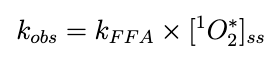

In [ ]:
#Obtain slope for all lines for quantum yield calculation, then take the negative to get kobs
#the [0] indicates I am pulling out the slope, i.e "m" in y=mx+b
kobs1=-(np.polyfit(times,sample1log,1)[0])
kobs2=-(np.polyfit(times,sample2log,1)[0])
kobs3=-(np.polyfit(times,sample3log,1)[0])
kobsPN=-(np.polyfit(PNtime,PNlog,1)[0])

print('Sample 1 Slope:', kobs1)
print('Sample 2 Slope:', kobs2)
print('Sample 3 Slope:', kobs3)
print('PN Slope:', kobsPN)

In [ ]:
#Check that the intercept ("b" in y=mx+b) is not too large
#If the intercept is large, this indicates that psuedo first order kinetics is not a suitable approximation 
print(np.polyfit(times,sample1log,1)[1])
print(np.polyfit(times,sample2log,1)[1])
print(np.polyfit(times,sample3log,1)[1])
print(np.polyfit(PNtime,PNlog,1)[1])

# Plot the HPLC results

In [ ]:
#Plot the results
plt.plot(times,sample1log,'bo',label='Sample 1')
plt.plot(times,times*(-kobs1),'b--')

plt.plot(times,sample2log,'go',label='Sample 2')
plt.plot(times,times*(-kobs2),'g--')

plt.plot(times,sample3log,'go',label='Sample 3')
plt.plot(times,times*(-kobs3),'g--')

#Plot legend and axis labels
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
plt.ylabel('ln(${[FFA]_t}$/${[FFA]_0}$)')
plt.xlabel('Irradiation time (sec)')
plt.show()


# Rate of Absorbance for Samples

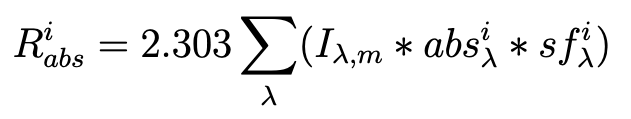

In [ ]:
#Sample 1
pathlength=1 #put in pathlength of cuvette

alpha1= sample1_abs  #put in the absorbance array from UV-Vis 

sf_samp1=(1-10**(-alpha1*pathlength))/(2.303*alpha1*pathlength) #screening factor: alpha is the absorbance 

R_abs_samp1 = 2.303*np.sum(Irr_mmol  * alpha1 * sf_samp1)


In [ ]:
#Sample 2
pathlength=1 #put in pathlength of cuvette

alpha2= sample2_abs  #put in the absorbance array from UV-Vis 

sf_samp2=(1-10**(-alpha2*pathlength))/(2.303*alpha2*pathlength) #screening factor: alpha is the absorbance 

R_abs_samp2 = 2.303*np.sum(Irr_mmol  * alpha2 * sf_samp2)


In [ ]:
#Sample 3
pathlength=1 #put in pathlength of cuvette

alpha3= sample3_abs  #put in the absorbance array from UV-Vis 

sf_samp3=(1-10**(-alpha3*pathlength))/(2.303*alpha3*pathlength) #screening factor: alpha is the absorbance 

R_abs_samp3 = 2.303*np.sum(Irr_mmol  * alpha3 * sf_samp3)


# Rate of Absorbance for PN (Reference sensitizer) 

In [ ]:
alphaPN=PN_abs #put in the absorbance array from UV-Vis 

sf_PN=(1-10**(-alphaPN*pathlength))/(2.303*alphaPN*pathlength) #screening factor: alpha is the absorbance 

R_abs_PN = 2.303*np.sum(Irr_mmol * alphaPN * sf_PN)

# Final Quantum Yield Calculation

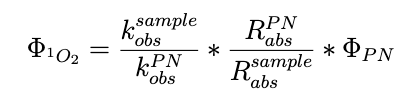

In [ ]:
Phi_PN=1 #from Schweitzer and Schmidt 

Phi_1O2_samp1 = (kobs1 / kobsPN) * (R_abs_PN / R_abs_samp1) * Phi_PN
print('Quantum Yield Sample 1:', Phi_1O2_samp1)

Phi_1O2_samp2 = (kobs2 / kobsPN) * (R_abs_PN / R_abs_samp2) * Phi_PN
print('Quantum Yield Sample 2:', Phi_1O2_samp2)

Phi_1O2_samp3 = (kobs3 / kobsPN) * (R_abs_PN / R_abs_samp3) * Phi_PN
print('Quantum Yield Sample 3:', Phi_1O2_samp3)

#Multiply these values by 100 for a % quantum yield 

# Singlet Oxygen Steady State Concentration 

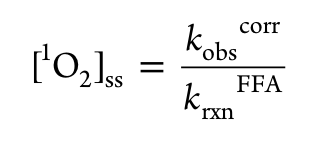

In [ ]:
Temp= #Put in your experimental temperature here, degrees C
kffa=10**8 + (2.1E6*(Temp-22)) #from Appaini (2017)

SS1=kobs1/kffa
print('Singlet Oxygen steady state concentration 1:', SS1) 

SS2=kobs2/kffa
print('Singlet Oxygen steady state concentration 2:', SS2) 

SS3=kobs3/kffa
print('Singlet Oxygen steady state concentration 3:', SS3) 
